# COMP41680 - Assignment 2

Student Number: 15204279

Name: Jiandong Wang

In this assignment, I collected a dataset of tweets created during a football match by **Twitter API**. To be exact, the tweets are downloaded through **Tweepy**, an easy-to-use Python library for accessing the Twitter API.

The football macth is the second leg of Champions League Quarter-final, Barcelona vs Atletico Madrid, which took place on Wednesday, April 13, 7:45 PM. Atletico Madrid won the game with a 2-0 result. Griezmann scored twice at 36' and 88' pen.

I collected all the tweets containing the string #AtletiFCB and the time frame for download is from 7:00PM to 8:45PM in Spain time, which is from about 15 minutes after the game' start(I expected to capture the data before the game started, but I got a wrong time), to about 15 minutes after the end of the game. During this time, **82,823 tweets** were collected in JSON format and stored in a file called 'AtletiFCB.json', making for about **400Mb** of data.

The following code is used for download the tweets with '**#AtletiFCB**' into AtletiFCB.json:

In [ ]:
import tweepy

consumer_key = "YRysGfA3UHerWw4e1wkJWxYY7"
consumer_secret = 'lDwuuDN8TtAijKVBp7WCtfF0z313sY6vTGBfOUBRWxhEWsMlYO'
access_token = '1446070987-XXsid7PmC2jwZnYBw7NG1h9aQaYDEqsEjeKrrrZ'
access_secret = 'saVdWgdL1MPxMccd50onYDmYA5YbP1lt0bFebomYBHfnC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            # I set the file format as .json 
            # because it's too large and I can't open it with my editor in other formats like .txt
            with open('AtletiFCB.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True

twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#AtletiFCB'])

The data in  AtletiFCB.json has many space lines and nosiy data produced by Twitter API, like:  
*{"limit":{"track":100,"timestamp_ms":"1460575364010"}}*  
So I firstly clean them and stored the data into a new file before I represent.


In [1]:
import json

i = 0
real_tweets = []
with open('AtletiFCB.json', 'r') as f:
    for line in f:
        line = line.strip()
        if line and 'text' in line:
            i += 1
            tweet = json.loads(line)
            real_tweets.append(tweet)
print(i)
    
with open("tweets.json", "w") as fout:
#     fieldnames = full_data.keys()
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for data in json_data:
#         writer.writerow(data)
#     for tweet in tweets:
    s = json.dumps(real_tweets)
    fout.write(s)
print("hhhh")

81587
hhhh


hhhh


In [2]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams 
import re
import string
#from collections import Counter
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    return tokens


punctuation = list(string.punctuation)
stop = stopwords.words('english') + stopwords.words('spanish') + punctuation + ['rt', 'via']




with open('tweets.json', 'r') as f:
    s = f.read()
tweets = json.loads(s)

j = 0
for t in tweets:
    j += 1
print(j)


81587


In [4]:
import pandas as pd
df = pd.read_json("tweets.json")



In [6]:
df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,scopes,source,text,timestamp_ms,truncated,user
0,NaN,None,2016-04-13 19:03:15,"{'hashtags': [{'indices': [120, 130], 'text': ...",NaN,0,False,low,None,720326501523070978,...,NaN,0,False,"{'truncated': False, 'retweet_count': 17, 'is_...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:15.639,False,"{'protected': False, 'verified': False, 'follo..."
1,NaN,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [99, 107], 'text': '...",NaN,0,False,low,None,720326503934861312,...,NaN,0,False,"{'truncated': False, 'retweet_count': 80, 'is_...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona_es: Minuto 6: Atento Ter Stege...,2016-04-13 19:03:16.214,False,"{'protected': False, 'verified': False, 'follo..."
2,NaN,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [93, 104], 'text': '...",{'media': [{'media_url_https': 'https://pbs.tw...,0,False,low,None,720326504463384576,...,NaN,0,False,"{'truncated': False, 'retweet_count': 557, 'is...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @Atleti: ¡¡IMPRESIONANTE!! Así recibió el C...,2016-04-13 19:03:16.340,False,"{'protected': False, 'verified': False, 'follo..."
3,NaN,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [122, 130], 'text': ...",NaN,0,False,low,None,720326504719257600,...,NaN,0,False,"{'truncated': False, 'retweet_count': 8, 'is_q...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @fcbarcelona_br: Min 15. Duelo equilibrado ...,2016-04-13 19:03:16.401,False,"{'protected': False, 'verified': False, 'follo..."
4,NaN,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [120, 130], 'text': ...",NaN,0,False,low,None,720326505226768384,...,NaN,0,False,"{'truncated': False, 'retweet_count': 18, 'is_...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:16.522,False,"{'protected': False, 'verified': False, 'follo..."


In [10]:
print(df.shape)
df.isnull().sum()

(81587, 32)


contributors                 81587
coordinates                  81465
created_at                       0
entities                         0
extended_entities            50700
favorite_count                   0
favorited                        0
filter_level                     0
geo                          81465
id                               0
id_str                           0
in_reply_to_screen_name      80492
in_reply_to_status_id        81119
in_reply_to_status_id_str    81119
in_reply_to_user_id          80492
in_reply_to_user_id_str      80492
is_quote_status                  0
lang                             0
place                        79158
possibly_sensitive           44609
quoted_status                78796
quoted_status_id             78796
quoted_status_id_str         78796
retweet_count                    0
retweeted                        0
retweeted_status             31641
scopes                       81580
source                           0
text                

In [15]:
drop = ['contributors','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','geo','possibly_sensitive', 'quoted_status',
       'quoted_status_id','quoted_status_id_str','scopes','extended_entities']
clean_df = df.drop(drop, axis=1)
print(clean_df.shape)
clean_df.isnull().sum()

(81587, 19)


coordinates         81465
created_at              0
entities                0
favorite_count          0
favorited               0
filter_level            0
id                      0
id_str                  0
is_quote_status         0
lang                    0
place               79158
retweet_count           0
retweeted               0
retweeted_status    31641
source                  0
text                    0
timestamp_ms            0
truncated               0
user                    0
dtype: int64

In [17]:
clean_df


,coordinates,created_at,entities,favorite_count,favorited,filter_level,id,id_str,is_quote_status,lang,place,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,None,2016-04-13 19:03:15,"{'hashtags': [{'indices': [120, 130], 'text': ...",0,False,low,720326501523070978,720326501523070976,False,en,None,0,False,"{'truncated': False, 'retweet_count': 17, 'is_...","<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:15.639,False,"{'protected': False, 'verified': False, 'follo..."
1,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [99, 107], 'text': '...",0,False,low,720326503934861312,720326503934861312,False,es,None,0,False,"{'truncated': False, 'retweet_count': 80, 'is_...","<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona_es: Minuto 6: Atento Ter Stege...,2016-04-13 19:03:16.214,False,"{'protected': False, 'verified': False, 'follo..."
2,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [93, 104], 'text': '...",0,False,low,720326504463384576,720326504463384576,False,es,None,0,False,"{'truncated': False, 'retweet_count': 557, 'is...","<a href=""http://twitter.com/download/android"" ...",RT @Atleti: ¡¡IMPRESIONANTE!! Así recibió el C...,2016-04-13 19:03:16.340,False,"{'protected': False, 'verified': False, 'follo..."
3,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [122, 130], 'text': ...",0,False,low,720326504719257600,720326504719257600,False,es,None,0,False,"{'truncated': False, 'retweet_count': 8, 'is_q...","<a href=""http://twitter.com/download/android"" ...",RT @fcbarcelona_br: Min 15. Duelo equilibrado ...,2016-04-13 19:03:16.401,False,"{'protected': False, 'verified': False, 'follo..."
4,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [120, 130], 'text': ...",0,False,low,720326505226768384,720326505226768384,False,en,None,0,False,"{'truncated': False, 'retweet_count': 18, 'is_...","<a href=""http://twitter.com/download/android"" ...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:16.522,False,"{'protected': False, 'verified': False, 'follo..."
5,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [139, 140], 'text': ...",0,False,low,720326505092395008,720326505092395008,False,es,None,0,False,"{'truncated': False, 'retweet_count': 2044, 'i...","<a href=""http://twitter.com/download/android"" ...",RT @FCBarcelona_es: XI del Barça 🔵🔴:\n1.Ter St...,2016-04-13 19:03:16.490,False,"{'protected': False, 'verified': False, 'follo..."
6,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [53, 63], 'text': 'A...",0,False,low,720326506053046273,720326506053046272,False,fr,None,0,False,"{'truncated': False, 'retweet_count': 1, 'is_q...","<a href=""http://twitter.com/download/android"" ...",RT @djasair: LE DRAPEAU DZ IL EST PARTOUT !!! ...,2016-04-13 19:03:16.719,False,"{'protected': False, 'verified': False, 'follo..."
7,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [50, 60], 'text': 'A...",0,False,low,720326506451505152,720326506451505152,False,fr,"{'country': 'Senegal', 'name': 'Senegal', 'att...",0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Godin c un btrd il commence déjà à chauffé Ney...,2016-04-13 19:03:16.814,False,"{'protected': False, 'verified': False, 'follo..."
8,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [53, 63], 'text': 'A...",0,False,low,720326506992508928,720326506992508928,False,es,None,0,False,NaN,"<a href=""http://itunes.apple.com/us/app/twitte...",18' 0-0 El partido se vuelve lento pero muy pr...,2016-04-13 19:03:16.943,False,"{'protected': False, 'verified': False, 'follo..."
9,None,2016-04-13 19:03:17,"{'hashtags': [{'indices': [93, 104], 'text': '...",0,False,low,720326507797856256,720326507797856256,False,es,None,0,False,"{'truncated': False, 'retweet_count': 558, 'is...","<a href=""http://twitter.com/download/android"" ...",RT @Atleti: ¡¡IMPRESIONANTE!! Así recibió el C...,2016-04-13 19:03:17.135,False,"{'protected': False, '

In [18]:
groups = clean_df.groupby("lang")

In [20]:
# groups.sum()

81587


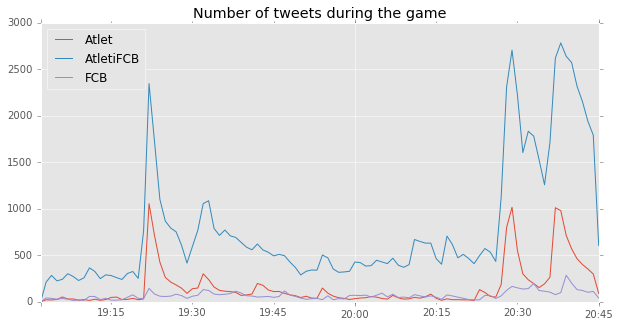

In [44]:


# still need to tell IPython to display plots within the notebook
%matplotlib inline
# this is not strictly necessary, it just improves the style of the Matplotlib plots
import matplotlib
matplotlib.style.use("ggplot")

timestamp= []
# a list of "1" or "0"to count the tweets
timestamp_AtletiFCB = []
timestamp_Atleti = []
timestamp_FCB = []

a = 0

for index,row in clean_df.iterrows():
    a += 1
    tweet_text = row['text']
    tweet_time = row['created_at']
    tokens = preprocess(tweet_text)
    terms_all = [term for term in tokens if term not in stop]

    timestamp.append(tweet_time)
    timestamp_AtletiFCB.append(1)

    if '@Atleti' in terms_all:
        timestamp_Atleti.append(1)
    else: 
        timestamp_Atleti.append(0)

    if '@FCBarcelona' in terms_all:
        timestamp_FCB.append(1)
    else:
        timestamp_FCB.append(0)
    
    
print(a)
# the index of the DataFrame
idx_AtletiFCB = pd.DatetimeIndex(timestamp)

all_data = dict(Atlet=timestamp_Atleti,AtletiFCB=timestamp_AtletiFCB,FCB=timestamp_FCB)

AtletiFCB = pd.DataFrame(data=all_data, index=idx_AtletiFCB)
#  Resampling
AtletiFCB =  AtletiFCB.resample('1Min', how='sum').fillna(0)
p = AtletiFCB.plot(title="Number of tweets during the game",figsize=(10,5))




In [42]:

# AtletiFCB = pandas.DataFrame(data=all_data,
#                                index=idx_AtletiFCB)
# #  Resampling
# # AtletiFCB =  AtletiFCB.resample('1s', how='sum').fillna(0)
# AtletiFCB
idx_AtletiFCB = pd.DatetimeIndex(timestamp)
idx_AtletiFCB

DatetimeIndex(['2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               ...
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22',
               '2016-04-13 20:45:22', '2016-04-13 20:45:22'],
              dtype='datetime64[ns]', length=81587, freq=None)